<a href="https://colab.research.google.com/github/jahanzaib-iqbal/IDS-Assignment-2/blob/main/IDS_Assignment_2_FA20_BSE_091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

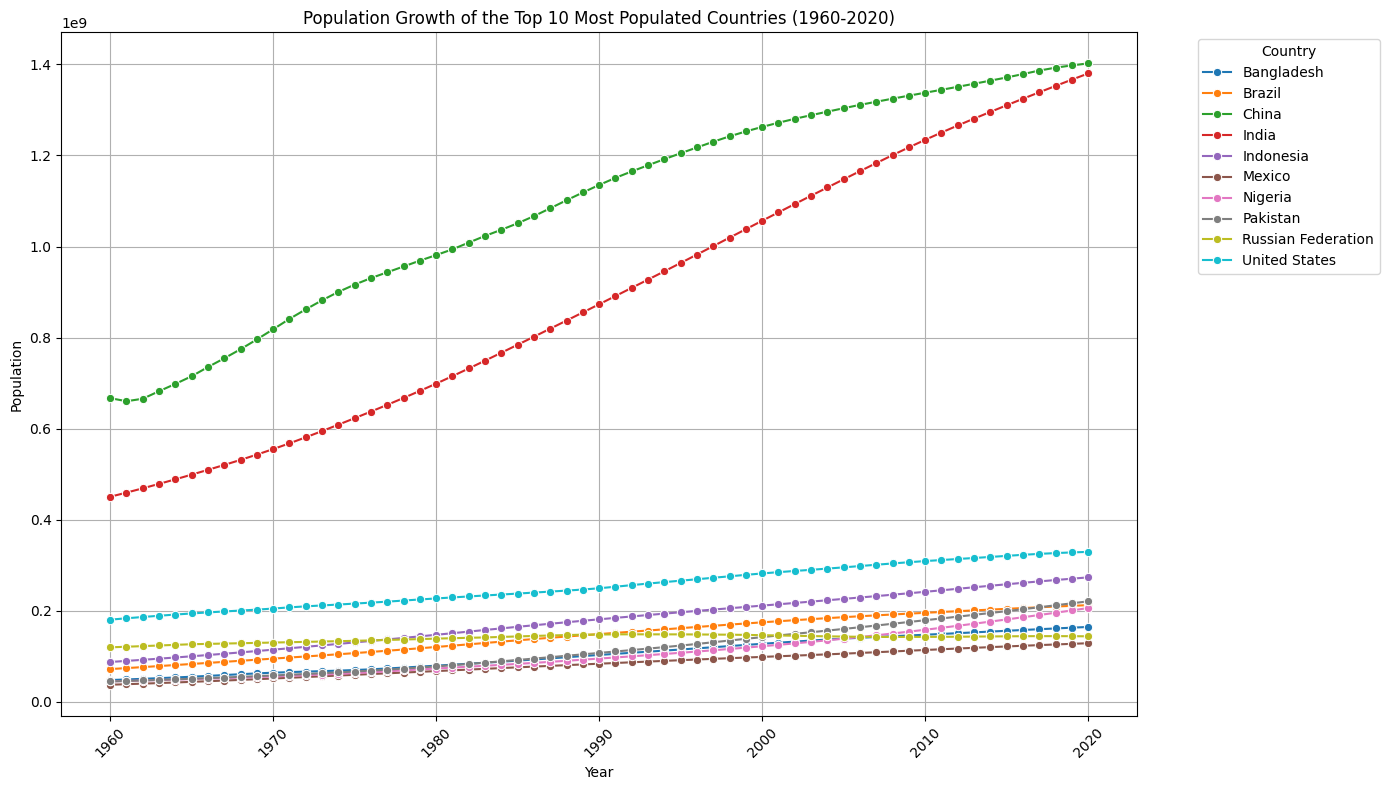

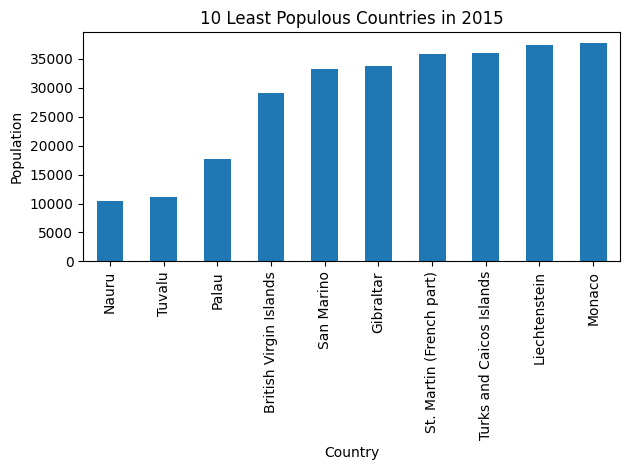

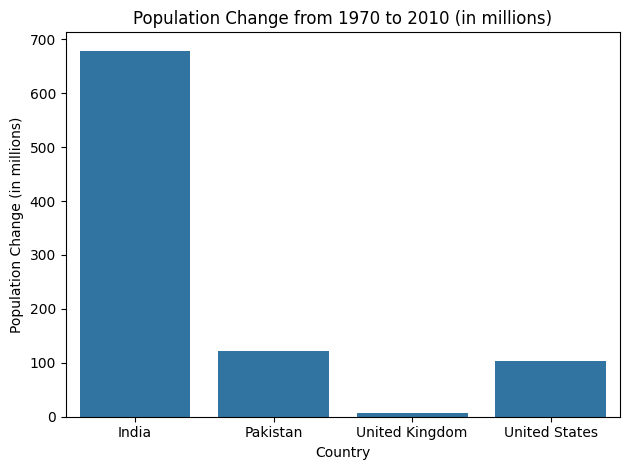

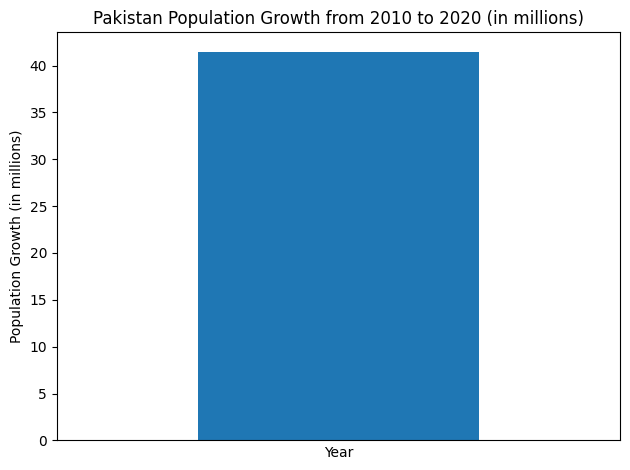

In [ ]:
# 3-28-2024
# CSC461 – Assignment2 – IDS – Data Visualization
# JAHANZAIB IQBAL
# FA20-BSE-091
# Question # 01 and Question 02

# The world population dataset provides population data from 1960 to 2020 for countries around the world.
# Compare the populations of top 10 highest populated countries (in 2020) over the entire period using a chart.
# Make appropriate modifications to the chart title, axis titles, legend, figure size, font size, colors etc. to make the chart readable and visually appealing.
# Question2:
# Using the world population dataset (from Q1)
# • Show the population of 10 least populous countries in 2015 using a chart.
# • Calculate the change in population of Pakistan, India, United States, and United Kingdom from 1970 to 2010 and show the population change (in millions) using a chart.
# • Calculate the Pakistan population growth between 2010-2020 and then show the data using a chart.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./sample_data/world_pop.csv')

# Melt the DataFrame to convert it from wide format to long format
df_melted = df.melt(id_vars=['country'], var_name='Year', value_name='Population')
df_melted['Year'] = df_melted['Year'].str.replace('year_', '').astype(int)  # Convert 'Year' to integer.

# Filter to get the top 10 countries based on population in 2020
top_10_countries_2020 = df_melted[df_melted['Year'] == 2020].nlargest(10, 'Population')['country']

# Filter the melted DataFrame to only include data for the top 10 countries
df_top_10 = df_melted[df_melted['country'].isin(top_10_countries_2020)]

# Plotting the population growth of the top 10 most populated countries (1960-2020)
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_10, x='Year', y='Population', hue='country', marker='o', palette='tab10')
plt.title('Population Growth of the Top 10 Most Populated Countries (1960-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# For showing the population of the 10 least populous countries in 2015:
least_populous_2015 = df.nsmallest(10, 'year_2015')[['country', 'year_2015']].set_index('country')
least_populous_2015.plot(kind='bar', legend=None)
plt.title('10 Least Populous Countries in 2015')
plt.xlabel('Country')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

# For calculating and showing the population change from 1970 to 2010:
df['population_change_1970_to_2010'] = (df['year_2010'] - df['year_1970']) / 1e6  # Convert to millions
selected_countries_change = df[df['country'].isin(['Pakistan', 'India', 'United States', 'United Kingdom'])]
sns.barplot(data=selected_countries_change, x='country', y='population_change_1970_to_2010')
plt.title('Population Change from 1970 to 2010 (in millions)')
plt.ylabel('Population Change (in millions)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

# For calculating and showing Pakistan's population growth from 2010 to 2020:
pakistan_growth = (df[df['country'] == 'Pakistan']['year_2020'] - df[df['country'] == 'Pakistan']['year_2010']) / 1e6
pakistan_growth.plot(kind='bar')
plt.title('Pakistan Population Growth from 2010 to 2020 (in millions)')
plt.ylabel('Population Growth (in millions)')
plt.xlabel('Year')
plt.xticks([])
plt.tight_layout()
plt.show()

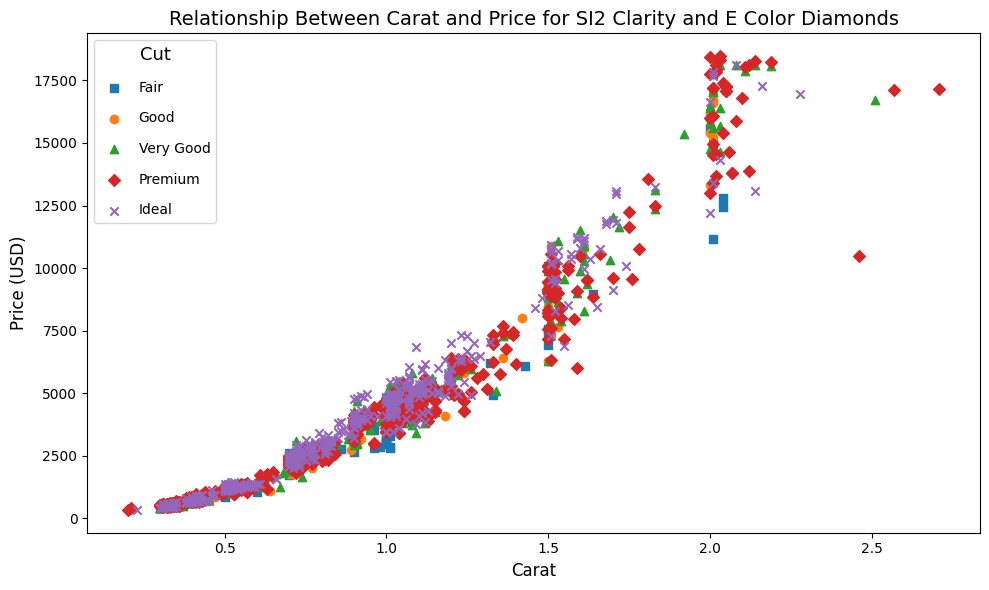

In [ ]:
# 3-28-2024
# CSC461 – Assignment2 – IDS – Data Visualization
# JAHANZAIB IQBAL
# FA20-BSE-091
# Question # 03
# The diamonds dataset contains 53,000 records with various attributes like carat, cut, color, clarity, price etc.
# Plot the relationship between ‘carat’ and ‘price’ of diamonds using a chart. Because it’s a large dataset, just
# plot the diamonds with a ‘clarify’ = ‘SI2’ and ‘color’ = ‘E’. Use the values of the ‘cut’ for colors in the plot.
# Make appropriate modifications to the chart title, axis titles, legend, figure size, font size, colors etc. to make
# the chart readable and visually appealing.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./sample_data/diamonds.csv')

# Filter the DataFrame
filtered_df = df[(df['clarity'] == 'SI2') & (df['color'] == 'E')]

# Define markers for different cuts
cut_markers = {'Fair': 's', 'Good': 'o', 'Very Good': '^', 'Premium': 'D', 'Ideal': 'x'}

plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each cut separately with a different marker
for cut, marker in cut_markers.items():
    cut_data = filtered_df[filtered_df['cut'] == cut]
    plt.scatter(cut_data['carat'], cut_data['price'], marker=marker, label=cut)

plt.title('Relationship Between Carat and Price for SI2 Clarity and E Color Diamonds', fontsize=14)
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Cut', title_fontsize='13', labelspacing=1.2)
plt.tight_layout()  # Adjust the layout to make room for the legend and axis labels
plt.show()

In [ ]:
# 3-28-2024
# CSC461 – Assignment2 – IDS – Data Visualization
# JAHANZAIB IQBAL
# FA20-BSE-091
# Question # 04
# The nuclear waste dataset contains the locations of several nuclear waste storage sites in the US. Use map of
# the US to show these sites as markers on the map. Clicking on a marker should display the name of the site.
# Pick the appropriate location, zoom level and images tiles for the map.

import folium
import pandas as pd

# Read the data
df = pd.read_csv('./sample_data/nuclear_waste_sites.csv')

# Create a map centered on the United States
us_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles='OpenStreetMap')

# Add CircleMarkers for each nuclear waste site
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],  # Coordinates
        radius=5,  # Marker radius
        color='red',  # Marker color
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=row['text'],  # Popup text
    ).add_to(us_map)

# Display the map
us_map

In [ ]:
# 3-28-2024
# CSC461 – Assignment2 – IDS – Data Visualization
# JAHANZAIB IQBAL
# FA20-BSE-091
# Question # 05
# The Pakistan heritage sites dataset contains the geo locations of a number of heritage sites across Pakistan.
# Show these sites as markers on a map of the Pakistan. Clicking on a marker should display the name of the
# site. Pick the appropriate location, zoom level and images tiles for the map.

import folium
import pandas as pd

# Load the data
df = pd.read_csv('./sample_data/pak-heritage-sites.csv', header=None)
df.columns = ['Latitude', 'Longitude', 'Site']

# Initialize a folium map centered around the geographic center of Pakistan
pakistan_map = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

# Add CircleMarkers for each heritage site
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # Coordinates
        radius=5,  # Marker radius
        color='blue',  # Marker color
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['Site'],  # Popup text
    ).add_to(pakistan_map)

# Display the map
pakistan_map